## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pandas as pd
import scipy.stats as sts
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_df


# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].count()
mouse_count


1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID',])]
all_duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [26]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df 


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

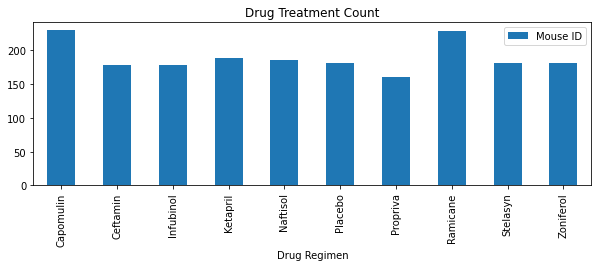

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")
drugs_df.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

drug_list = summary_df.index.tolist()
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [12]:
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

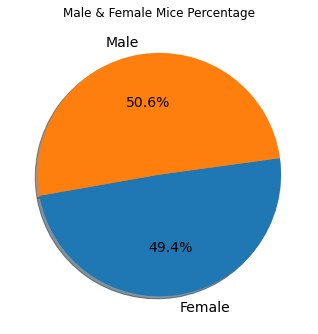

In [13]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [14]:
plt.clf()
plt.cla()
plt.close()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[935, 958]

## Quartiles, Outliers and Boxplots

In [16]:
labels = ["Females", "Males"]
colors = ["purple", "orange"]
explode = (0.1, 0)

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

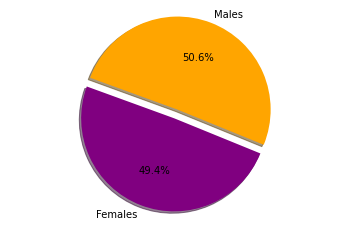

In [17]:
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

In [18]:
plt.clf()
plt.cla()
plt.close()

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Treatment_regimes = combined_df[combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
Treatment_regimes = Treatment_regimes.sort_values(["Timepoint"], ascending=True)
Treatment_regimes

Treatment_regimes_data = Treatment_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

Treatment_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [58]:
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
tumor_data =[]
    
for name in treatments:
    final_vol = combined_df.loc[combined_df["Drug Regimen"]== name, "Tumor Volume (mm3)"]                  
    tumor_data.append(final_vol) 
    
    quartiles = final_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_vol.loc[(final_vol < lower_bound) | (final_vol > upper_bound)]
    print(f"The {name}'s potential outliers: {outliers}")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
   
    
   

The Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
The Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
The Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
The Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


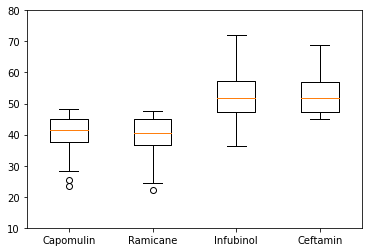

In [63]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = combined_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [64]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [65]:
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


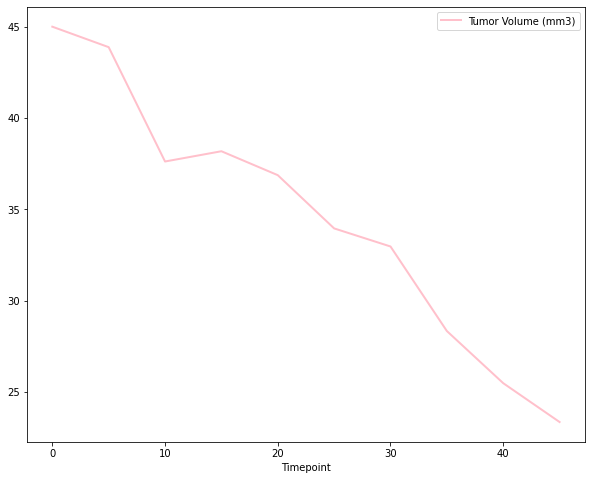

In [66]:
# Selecting only 2 columns
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index
#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2, color='pink')

In [68]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [69]:
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [70]:
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


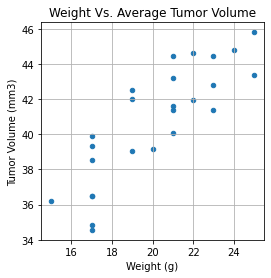

In [72]:
average_cap.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()


## Correlation and Regression

In [78]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(average_cap['Weight (g)'],average_cap['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and average tumor volume is 0.84
